# FORECASTING USEING FACEBOOK PROPHET MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet
import warnings
%matplotlib inline
from fbprophet import Prophet

In [23]:
df = pd.read_csv("/content/Inflation Rate  (montly).csv")
df.head(2)

,year,inflation_rate
0,1980-01-31,11.346
1,1980-02-29,11.455


In [24]:
df['year'] = pd.to_datetime(df['year'])

In [25]:
df = df[['year', 'inflation_rate']].reset_index(drop=True)
df.rename(columns={'year':'ds', 'inflation_rate':'y'}, inplace=True)
df.head(2)

,ds,y
0,1980-01-31,11.346
1,1980-02-29,11.455


In [26]:
train=df.head(345)
test=df.tail(148)
train

,ds,y
0,1980-01-31,11.34600
1,1980-02-29,11.45500
2,1980-03-31,11.56400
3,1980-04-30,11.67300
4,1980-05-31,11.78200
...,...,...
340,2008-05-31,10.16400
341,2008-06-30,10.43275
342,2008-07-31,10.70150
343,2008-08-31,10.97025


In [27]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=148)
future.tail(2)

,ds
491,2009-02-24
492,2009-02-25


In [29]:
forecast = m.predict(future)

In [30]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-31,10.058932,7.028607,12.819162,10.058932,10.058932,-0.047575,-0.047575,-0.047575,-0.047575,-0.047575,-0.047575,0.0,0.0,0.0,10.011356
1,1980-02-29,10.048557,7.214804,13.086454,10.048557,10.048557,-0.024815,-0.024815,-0.024815,-0.024815,-0.024815,-0.024815,0.0,0.0,0.0,10.023742


In [31]:
abc=forecast['yhat']

In [32]:
result=abc.tail(148)
result

345    5.832486
346    5.883474
347    5.937077
348    5.992336
349    6.048210
         ...   
488    5.844668
489    5.804377
490    5.764557
491    5.726102
492    5.689834
Name: yhat, Length: 148, dtype: float64

In [33]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [34]:
rmse_prophet_model = RMSE(test['y'], result)
rmse_prophet_model

2.8906310978564043

# Building Model on Full Dataset

In [2]:
df = pd.read_csv('/content/Inflation Rate  (montly).csv')

In [3]:
df.tail()

,year,inflation_rate
488,2020-09-30,5.7630
489,2020-10-31,5.7115
490,2020-11-30,5.6600
491,2020-12-31,5.6085
492,2021-01-31,5.5570


DROPING EXTRA VALUE

In [4]:
df1=df.drop(df.index[492])

In [5]:
df1.dtypes

year               object
inflation_rate    float64
dtype: object

CHANGING COLUMN NAMES TO "ds" and "y"

In [6]:
df1.columns=['ds','y']
df1.head()

,ds,y
0,1980-01-31,11.346
1,1980-02-29,11.455
2,1980-03-31,11.564
3,1980-04-30,11.673
4,1980-05-31,11.782


# visualization

In [7]:
import plotly.express as px

fig = px.line(df1, x='ds', y='y', title='Line Plot of Inflation Dataset')
fig.show()

In [8]:
df1['ds']=pd.to_datetime(df1.ds)

In [9]:
df1.dtypes

ds    datetime64[ns]
y            float64
dtype: object

# BUILDING MODEL

In [10]:
 model= Prophet()
 model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
model

# FORECASTED INFLATION FIGURES FOR NEXT FIVE YEARS

In [12]:
future=model.make_future_dataframe(periods=12 * 5, freq='M')

In [13]:
df1.tail()

,ds,y
487,2020-08-31,5.8145
488,2020-09-30,5.7630
489,2020-10-31,5.7115
490,2020-11-30,5.6600
491,2020-12-31,5.6085


In [14]:
future.tail()

,ds
547,2025-08-31
548,2025-09-30
549,2025-10-31
550,2025-11-30
551,2025-12-31


In [15]:
forecast =model.predict(future)
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-31,9.922172,6.871129,12.987544,9.922172,9.922172,0.013197,0.013197,0.013197,0.013197,0.013197,0.013197,0.0,0.0,0.0,9.935369
1,1980-02-29,9.912640,6.895969,12.983102,9.912640,9.912640,0.008057,0.008057,0.008057,0.008057,0.008057,0.008057,0.0,0.0,0.0,9.920696
2,1980-03-31,9.902450,6.864927,13.104756,9.902450,9.902450,0.007944,0.007944,0.007944,0.007944,0.007944,0.007944,0.0,0.0,0.0,9.910394
3,1980-04-30,9.892589,6.763530,13.097757,9.892589,9.892589,0.010644,0.010644,0.010644,0.010644,0.010644,0.010644,0.0,0.0,0.0,9.903232
4,1980-05-31,9.882399,6.721134,12.910178,9.882399,9.882399,0.006686,0.006686,0.006686,0.006686,0.006686,0.006686,0.0,0.0,0.0,9.889085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,2025-08-31,5.038696,1.841743,8.272177,5.019527,5.058100,-0.004296,-0.004296,-0.004296,-0.004296,-0.004296,-0.004296,0.0,0.0,0.0,5.034400
548,2025-09-30,5.029994,1.856992,8.230684,5.010341,5.049991,-0.006467,-0.006467,-0.006467,-0.006467,-0.006467,-0.006467,0.0,0.0,0.0,5.023527
549,2025-10-31,5.021002,1.931905,8.012973,5.000863,5.041406,-0.008994,-0.008994,-0.008994,-0.008994,-0.008994,-0.008994,0.0,0.0,0.0,5.012008
550,2025-11-30,5.012300,1.972228,7.922279,4.991709,5.033305,-0.009913,-0.009913,-0.009913,-0.009913,-0.009913,-0.009913,0.0,0.0,0.0,5.002387


In [16]:
pred1=forecast [['ds','yhat']]
pred1

,ds,yhat
0,1980-01-31,9.935369
1,1980-02-29,9.920696
2,1980-03-31,9.910394
3,1980-04-30,9.903232
4,1980-05-31,9.889085
...,...,...
547,2025-08-31,5.034400
548,2025-09-30,5.023527
549,2025-10-31,5.012008
550,2025-11-30,5.002387


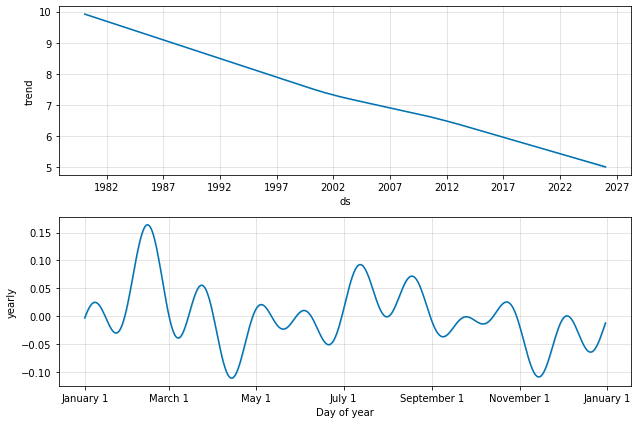

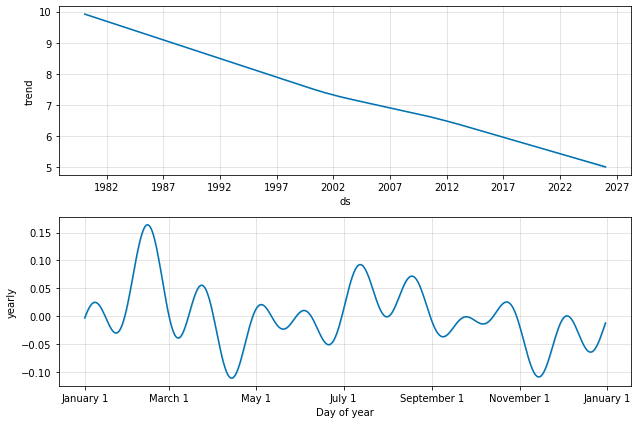

In [17]:
model.plot_components(forecast)

In [36]:
### Simple plot
# fig = m.plot(forecast)

### Using plot.ly
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast)